In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
from utils import *
from modules import *

In [3]:
G_list, data_list = load_processed_data(G_list_file='G_list.pickle', 
                                        data_list_file='data_list.pickle')

In [4]:
len(data_list)

11531

In [7]:
96.72 * 11531 / 10000

111.527832

In [150]:
idx = 10000
G, data = G_list[idx], data_list[idx]
pos = data.x

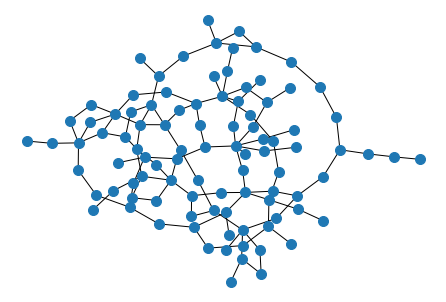

In [144]:
graph_vis(G, ground_truth(G))

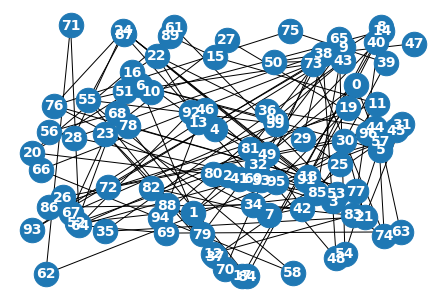

In [137]:
graph_vis(G, pos, node_size=600, with_labels=True, font_color="white", font_weight="bold", font_size=14)

In [225]:
umap_pos = umap_project(ground_truth(G), n_neighbors=15, min_dist=1)

In [226]:
umap_scale = get_stress_minimizing_scale(umap_pos, data)

In [227]:
scaled_umap_pos = umap_pos * umap_scale

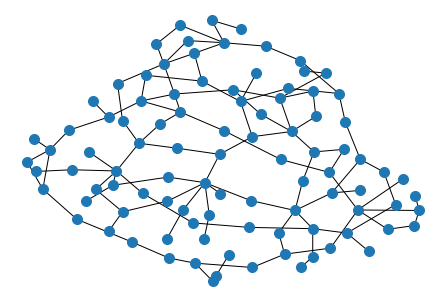

In [228]:
graph_vis(G, scaled_umap_pos)

In [9]:
scaled_ground_truth = pd.read_csv('scaled_gt_loss.csv', index_col=0)
folder_name = f"graphviz_baseline"
if not os.path.isdir(folder_name):
    os.mkdir(folder_name)

In [ ]:
for test_idx in tqdm(range(10000, 11000)):
    G_vis = G_list[test_idx]
    gt_loss = scaled_ground_truth.loc[test_idx][0]
    node_pos = get_ground_truth(G_vis)
    graph_vis(G_vis, node_pos, file_name=f'{folder_name}/{test_idx}_{gt_loss:.2f}.png')

In [19]:
class EnergyLossScaled(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, p, data, scale):
        edge_attr = data.edge_attr
        # convert per-node positions to per-edge positions
        start, end = node2edge(p, data)
        
        start *= scale
        end *= scale
        
        start_x = start[:, 0]
        start_y = start[:, 1]
        end_x = end[:, 0]
        end_y = end[:, 1]
        
        l = edge_attr[:, 0]
        k = edge_attr[:, 1]
        
        term1 = (start_x - end_x) ** 2
        term2 = (start_y - end_y) ** 2
        term3 = l ** 2
        term4 = 2 * l * (term1 + term2).sqrt()
        energy = k / 2 * (term1 + term2 + term3 - term4)
        return energy.sum()

In [23]:
criterion_scaled = EnergyLossScaled()
idx = 10320
data, G = data_list[idx], G_list[idx]
edge_attr = data.edge_attr
pos_map = nx.nx_agraph.graphviz_layout(G, prog='neato')
truth = np.array(list(pos_map.values()))

start, end = node2edge(torch.tensor(truth), data)
w = edge_attr[:, 1]
d = edge_attr[:, 0]

u2 = ((start - end) ** 2).sum(dim=1)

s = (w * d * u2.sqrt()).sum() / (w * u2).sum()

loss_gt = criterion_scaled(torch.tensor(truth), data, s)

print(loss_gt)

tensor(179.5161, dtype=torch.float64)


/opt/conda/lib/python3.7/site-packages/pygraphviz/agraph.py:1341: RuntimeWarning: Error: node n0, position (390.21, 470.91), expected two doubles
Error: node n3, position (315.93, 480.4), expected two doubles
Error: node n16, position (450.85, 427.51), expected two doubles
Error: node n1, position (893.61, 722.84), expected two doubles
Error: node n4, position (896.78, 660.89), expected two doubles
Error: node n46, position (811.11, 738.72), expected two doubles
Error: node n2, position (873.66, 341.76), expected two doubles
Error: node n6, position (829.48, 415.32), expected two doubles
Error: node n58, position (364.7, 438.02), expected two doubles
Error: node n8, position (807.93, 701.55), expected two doubles
Error: node n64, position (928.82, 576.15), expected two doubles
Error: node n5, position (884.34, 489.38), expected two doubles
Error: node n70, position (883.18, 545.31), expected two doubles
Error: node n9, position (906.49, 379.78), expected two doubles
Error: node n74, po